In [1]:
import librosa
audio_path = r"C:\Users\hp\Desktop\Feature\beach\a014-01-01-10_20.wav"
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [2]:
import IPython.display as ipd
ipd.Audio(audio_path)

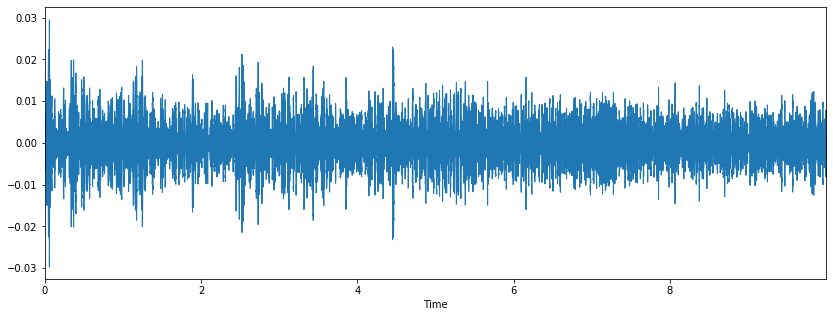

In [3]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

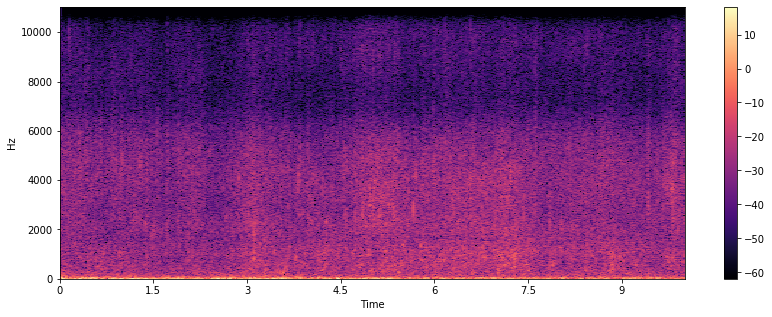

In [4]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


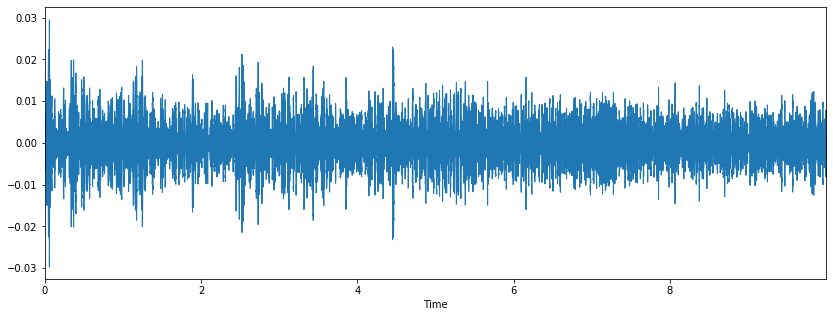

In [5]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

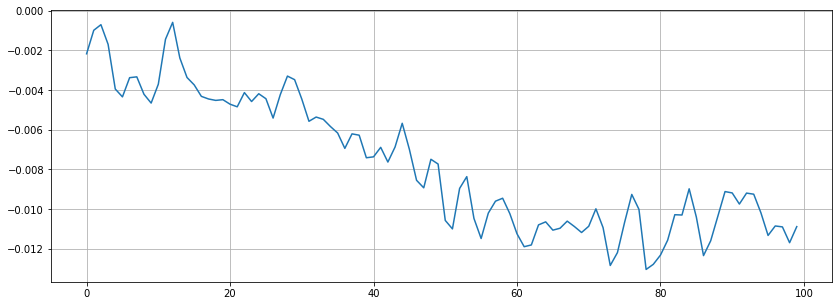

In [6]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [7]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

0


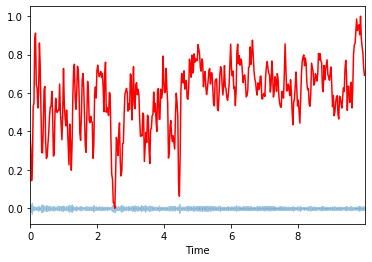

In [8]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

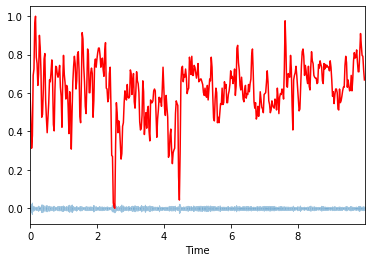

In [9]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 431)


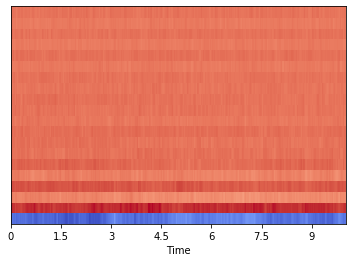

In [10]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [12]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras

In [13]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [15]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'beach bus cafe car city_center forest_path grocery_store home library metro_station office park residential_area train'.split()
for g in genres:
    for filename in os.listdir(f'/Users/hp/Desktop/Feature/{g}'):
        songname = f'/Users/hp/Desktop/Feature/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=10)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rmse(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [16]:
data = pd.read_csv('data.csv')
data

filename  chroma_stft      rmse  spectral_centroid  \
0            a007_20_30.wav     0.694817  0.026579        1364.705872   
1      a014-01-01-10_20.wav     0.741687  0.004577        2277.800541   
2    a014-01-01-160_170.wav     0.703664  0.004202        1986.967460   
3            a014_10_20.wav     0.741687  0.004577        2277.800541   
4          a014_160_170.wav     0.703664  0.004202        1986.967460   
..                      ...          ...       ...                ...   
453        b080_230_240.wav     0.676963  0.023915         543.433591   
454          b080_70_80.wav     0.698333  0.009261         916.326536   
455          b081_60_70.wav     0.642148  0.018072         413.187066   
456        b082_100_110.wav     0.613859  0.016918         701.996439   
457        b083_102_112.wav     0.600022  0.044291         385.449144   

     spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0           1986.209262  3164.231756            0.035301 -346.429700   
1           2388.947673  4858.834888            0.077501 -431.045631   
2           2302.645593  4531.140505            0.061005 -440.421508   
3           2388.947673  4858.834888            0.077501 -431.045631   
4           2302.645593  4531.140505            0.061005 -440.421508   
..                  ...          ...                 ...         ...   
453         1233.746387   854.258640            0.009455 -446.038179   
454         1685.433949  2106.057180            0.016651 -498.202518   
455         1035.251989   487.719557            0.009677 -485.080298   
456         1387.200758  1347.873597            0.016027 -438.633688   
457          963.239445   469.084093            0.009984 -412.513597   

          mfcc2      mfcc3  ...     mfcc12    mfcc13    mfcc14    mfcc15  \
0    108.161049  -5.010263  ...   6.863027  6.082835  5.599839 -0.544139   
1     81.188404 -19.983681  ...  10.371519  7.141554  9.786800  1.239608   
2     98.375570 -15.480723  ...   8.353411  6.055960  9.052861 -1.327068   
3     81.188404 -19.983681  ...  10.371519  7.141554  9.786800  1.239608   
4     98.375570 -15.480723  ...   8.353411  6.055960  9.052861 -1.327068   
..          ...        ...  ...        ...       ...       ...       ...   
453  153.492218  20.883363  ...   6.672186  6.831222  4.779959  7.602420   
454  131.963493  10.048664  ...   9.516545  4.511502  1.688769  5.987603   
455  153.050519  49.754319  ...   9.739163  1.176961  2.904940  4.925119   
456  139.134855  26.555195  ...   7.685189  3.726377  3.518736  5.552012   
457  175.962325  37.532285  ...   6.812547  3.757928  3.770365  6.981991   

        mfcc16    mfcc17     mfcc18    mfcc19    mfcc20  label  
0     6.447171  0.107353   5.729503 -1.870822  4.570478  beach  
1    11.921585  0.034888  10.066216  0.181321  8.607600  beach  
2    11.732653 -0.996032   8.226508 -1.967133  6.456439  beach  
3    11.921585  0.034888  10.066216  0.181321  8.607600  beach  
4    11.732653 -0.996032   8.226508 -1.967133  6.456439  beach  
..         ...       ...        ...       ...       ...    ...  
453   6.226053  2.660712   6.497305  3.466823  2.035949  train  
454   5.582666  1.470358   6.094954  3.358815  2.782658  train  
455   3.948491 -0.419488   1.240834  4.079452  0.316613  train  
456   2.799363 -1.472964   3.027280  3.651370  0.262000  train  
457   4.457230 -1.525449   1.139339 -2.463790 -4.931151  train  

[458 rows x 28 columns]